In [0]:
import pandas as pd
import numpy as np

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/lab_data.csv')

In [15]:
dataset

,timestamp,backup_c_drive,backup_d_drive,backup_cpu_load,backup_mem_used,chassis_temp
0,2020-02-22 16:00:00,36.42,560.41,51.0,2267.483333,23.988333
1,2020-02-22 16:00:00,36.42,560.41,51.0,2267.483333,25.966667
2,2020-02-22 16:00:00,36.42,560.41,51.0,2267.483333,22.000000
3,2020-02-22 16:00:00,36.42,560.41,51.0,2268.855000,23.988333
4,2020-02-22 16:00:00,36.42,560.41,51.0,2268.855000,25.966667
...,...,...,...,...,...,...
9737734,2019-11-26 11:30:00,35.41,448.39,0.0,2146.891600,25.000000
9737735,2019-11-26 11:30:00,35.41,448.39,0.0,2146.891600,22.000000
9737736,2019-11-26 11:30:00,35.41,448.39,0.0,2120.993200,23.135370
9737737,2019-11-26 11:30:00,35.41,448.39,0.0,2120.993200,25.000000


In [16]:
dataset.describe()

,backup_c_drive,backup_d_drive,backup_cpu_load,backup_mem_used,chassis_temp
count,9.252468e+06,9.252468e+06,9.252468e+06,9.252468e+06,9.385632e+06
mean,3.583786e+01,5.095810e+02,9.745241e+00,2.219584e+03,2.348650e+01
std,1.681069e+00,6.301104e+01,1.794297e+01,1.974269e+02,1.865271e+00
min,2.645000e+01,1.939000e+02,0.000000e+00,1.005360e+03,1.500000e+01
25%,3.591000e+01,4.483800e+02,5.611110e-01,2.154619e+03,2.203333e+01
50%,3.641000e+01,5.604000e+02,2.000000e+00,2.248847e+03,2.351167e+01
75%,3.645000e+01,5.604100e+02,6.302787e+00,2.270776e+03,2.500000e+01
max,3.714400e+01,8.300992e+02,1.000000e+02,7.563266e+03,3.600000e+01


In [0]:
dataset=dataset.dropna()

In [18]:
  X = dataset.iloc[:, 1:5].values
X

array([[  36.42    ,  560.41    ,   51.      , 2267.483333],
       [  36.42    ,  560.41    ,   51.      , 2267.483333],
       [  36.42    ,  560.41    ,   51.      , 2267.483333],
       ...,
       [  35.41    ,  448.39    ,    0.      , 2120.9932  ],
       [  35.41    ,  448.39    ,    0.      , 2120.9932  ],
       [  35.41    ,  448.39    ,    0.      , 2120.9932  ]])

In [19]:
y = dataset.iloc[:, 5].values
y

array([23.988333, 25.966667, 22.      , ..., 23.13537 , 25.      ,
       22.      ])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train
Y_train
X_test
Y_test

array([21.033333, 22.      , 25.      , ..., 25.      , 26.      ,
       26.      ])

In [0]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [0]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

In [0]:
regressor.score(X_train, Y_train)
acc_random_forest = round(regressor.score(X_train, Y_train) * 100, 2)

In [28]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.9842205501093597
Mean Squared Error: 1.7532782475632538
Root Mean Squared Error: 1.324114136909373


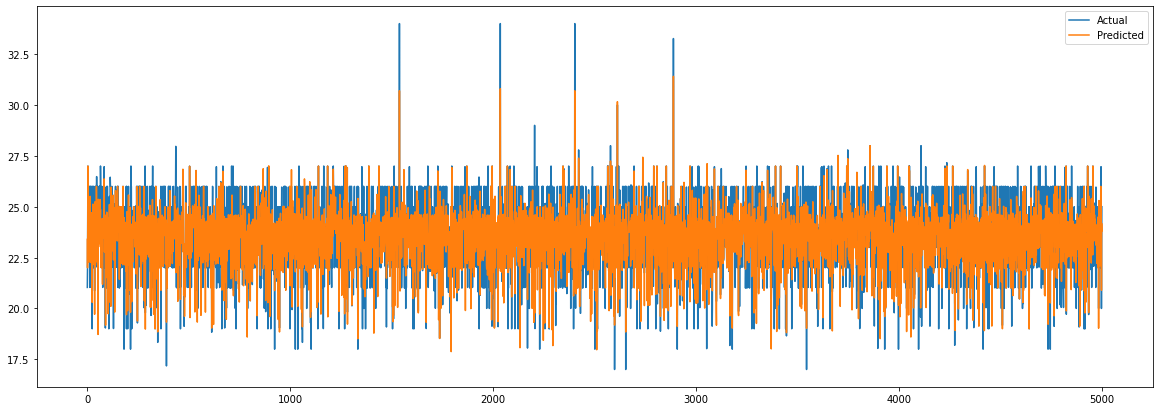

In [31]:
dataset_v = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
import matplotlib.pyplot as plt
dataset_v = dataset_v.head(5000)
dataset_v.plot(kind='line',figsize=(20,7))
plt.show()

In [0]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
#acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [34]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 1.0929244689648643
Mean Squared Error: 2.2474961724068896
Root Mean Squared Error: 1.4991651584821766


In [0]:
dataset_v = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

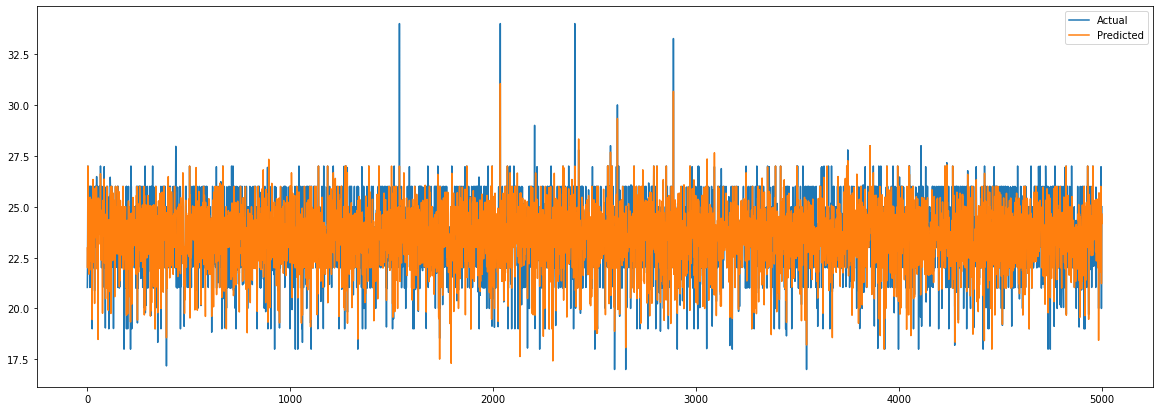

In [37]:
import matplotlib.pyplot as plt
dataset_v = dataset_v.head(5000)
dataset_v.plot(kind='line',figsize=(20,7))
plt.show()

In [0]:
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [0]:
sgd = linear_model.SGDRegressor(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_predic = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [0]:
dataset_v = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predic})

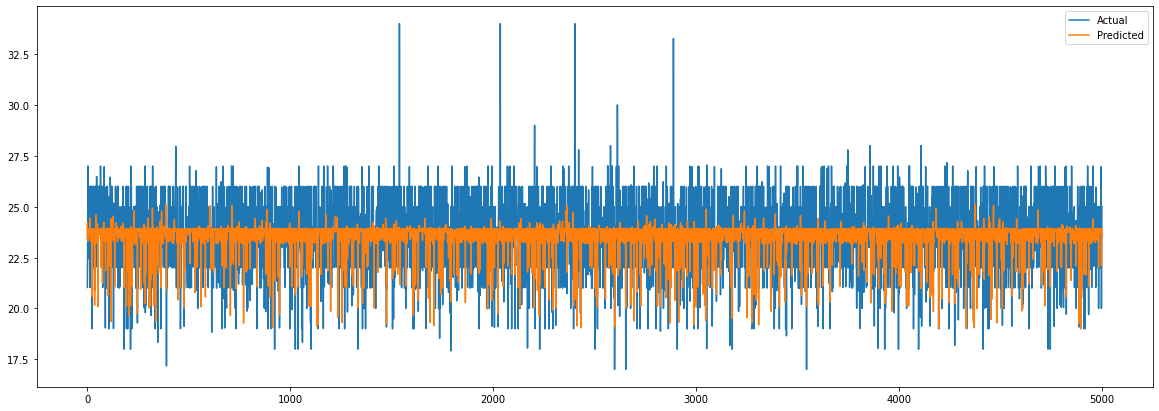

In [46]:
import matplotlib.pyplot as plt
dataset_v = dataset_v.head(5000)
dataset_v.plot(kind='line',figsize=(20,7))
plt.show()

In [0]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor() 
decision_tree.fit(X_train, Y_train)  
Y_prediction = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [49]:
results = pd.DataFrame({
    'Model': [ 'KNN', 
              'Random Forest', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [ acc_knn, 
              acc_random_forest, acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
52.00,Decision Tree
51.90,Random Forest
36.78,KNN
17.41,Stochastic Gradient Decent
